# 0. Preâmbulo 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

from glob import glob
import re

from matplotlib import pyplot as plt
from matplotlib.offsetbox import AnchoredText
import plotly.express as px

import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


from pylab import rcParams
rcParams['figure.figsize'] = (18,7)

# 1. Importação e integração dos conjuntos de dados

In [2]:
file_list = glob('Dados/*.csv')
df_merged = pd.DataFrame(columns=['cod', 'nome', 'pvp'])

for idx,file in enumerate(file_list):
    df = pd.read_csv(file, sep=';', encoding='cp1252', decimal=',')
    file_name = file.split('\\')[-1]
    years = re.findall('\d+', file)
    if idx==0:
        date_start = '{}-01-01'.format(years[0][:4])
    else:
        date_start = '{}-03-01'.format(years[0][:4])
    date_end = '{}-03-01'.format(years[0][-4:])
    col_names1 = ['cod', 'nome', 'stock', 'localizacao', 'stock_tot', 'pvp', 'valor_vendas']
    col_names2 = pd.date_range(date_start, date_end, freq='MS').strftime('%Y-%m-%d').tolist()
    col_names3 = ['tot_uni']
    col_names = col_names1+col_names2+col_names3
    df.columns = col_names
    if idx!=len(file_list)-1:
        df = df.drop(columns=['stock_tot', 'localizacao', 'stock', 'valor_vendas', col_names2[-1], 'tot_uni'])
    else:
        df = df.drop(columns=['stock_tot', 'localizacao', 'stock', 'valor_vendas', 'tot_uni'])
    df_merged = pd.merge(df_merged, df, on=['cod', 'nome', 'pvp'], how='outer')

In [3]:
print('df_merged tem a quantidade vendida de medicamentos catalogados para "gripes e constipações":')
print('- para {} medicamentos'.format(df_merged.shape[0]))
print('- em {} meses'.format(df_merged.iloc[:,3:].shape[1]))

df_merged tem a quantidade vendida de medicamentos catalogados para "gripes e constipações":
- para 22 medicamentos
- em 123 meses


In [4]:
file_list = glob('Paracetamol/*.csv')
df_merged_paracetamol = pd.DataFrame(columns=['cod', 'nome', 'pvp'])

for idx,file in enumerate(file_list):
    df = pd.read_csv(file, sep=';', encoding='cp1252', decimal=',')
    file_name = file.split('\\')[-1]
    years = re.findall('\d+', file)
    if idx==0:
        date_start = '{}-01-01'.format(years[0][:4])
    else:
        date_start = '{}-03-01'.format(years[0][:4])
    date_end = '{}-03-01'.format(years[0][-4:])
    col_names1 = ['cod', 'nome', 'stock', 'localizacao', 'stock_tot', 'pvp', 'valor_vendas']
    col_names2 = pd.date_range(date_start, date_end, freq='MS').strftime('%Y-%m-%d').tolist()
    col_names3 = ['tot_uni']
    col_names = col_names1+col_names2+col_names3
    df.columns = col_names
    if idx!=len(file_list)-1:
        df = df.drop(columns=['stock_tot', 'localizacao', 'stock', 'valor_vendas', col_names2[-1], 'tot_uni'])
    else:
        df = df.drop(columns=['stock_tot', 'localizacao', 'stock', 'valor_vendas', 'tot_uni'])
    df_merged_paracetamol = pd.merge(df_merged_paracetamol, df, on=['cod', 'nome', 'pvp'], how='outer')

In [5]:
print('df_merged tem a quantidade vendida de medicamentos catalogados para "paracetamol":')
print('- para {} medicamentos'.format(df_merged_paracetamol.shape[0]))
print('- em {} meses'.format(df_merged_paracetamol.iloc[:,3:].shape[1]))

df_merged tem a quantidade vendida de medicamentos catalogados para "paracetamol":
- para 13 medicamentos
- em 123 meses


In [6]:
df_merged = pd.concat([df_merged, df_merged_paracetamol], ignore_index=True)

In [7]:
print('df_merged tem a quantidade vendida de medicamentos catalogados para "gripes e constipações + paracetamol":')
print('- para {} medicamentos'.format(df_merged.shape[0]))
print('- em {} meses'.format(df_merged.iloc[:,3:].shape[1]))

df_merged tem a quantidade vendida de medicamentos catalogados para "gripes e constipações + paracetamol":
- para 35 medicamentos
- em 123 meses


In [8]:
# colunas de df_merged
print(*df_merged.columns[:3], sep=' - ')
for i in range(12):
    print(*df_merged.columns[i*12+3:i*12+15], sep=' - ')

cod - nome - pvp
2013-01-01 - 2013-02-01 - 2013-03-01 - 2013-04-01 - 2013-05-01 - 2013-06-01 - 2013-07-01 - 2013-08-01 - 2013-09-01 - 2013-10-01 - 2013-11-01 - 2013-12-01
2014-01-01 - 2014-02-01 - 2014-03-01 - 2014-04-01 - 2014-05-01 - 2014-06-01 - 2014-07-01 - 2014-08-01 - 2014-09-01 - 2014-10-01 - 2014-11-01 - 2014-12-01
2015-01-01 - 2015-02-01 - 2015-03-01 - 2015-04-01 - 2015-05-01 - 2015-06-01 - 2015-07-01 - 2015-08-01 - 2015-09-01 - 2015-10-01 - 2015-11-01 - 2015-12-01
2016-01-01 - 2016-02-01 - 2016-03-01 - 2016-04-01 - 2016-05-01 - 2016-06-01 - 2016-07-01 - 2016-08-01 - 2016-09-01 - 2016-10-01 - 2016-11-01 - 2016-12-01
2017-01-01 - 2017-02-01 - 2017-03-01 - 2017-04-01 - 2017-05-01 - 2017-06-01 - 2017-07-01 - 2017-08-01 - 2017-09-01 - 2017-10-01 - 2017-11-01 - 2017-12-01
2018-01-01 - 2018-02-01 - 2018-03-01 - 2018-04-01 - 2018-05-01 - 2018-06-01 - 2018-07-01 - 2018-08-01 - 2018-09-01 - 2018-10-01 - 2018-11-01 - 2018-12-01
2019-01-01 - 2019-02-01 - 2019-03-01 - 2019-04-01 - 2019-05

In [9]:
# lista de medicamentos e respetivo preço
df_metainfo = df_merged[['cod', 'nome', 'pvp']]
with pd.option_context('display.max_rows', 5, 'display.min_rows', 25):
    display(df_metainfo)

,cod,nome,pvp
0,2487593,Antigrippine x 20 comp,6.90
1,6293159,Bisolviral Spray Nasal 20ml,10.95
...,...,...,...
33,5775739,"Paracetamol Mylan MG, 1000 mg Blister 20 Unida...",1.52
34,5478300,"Supofen MG, 1000 mg x 18 comp",1.89


In [10]:
del col_names, col_names1, col_names2, col_names3, date_start, date_end
del df, file, file_list, file_name, idx, years, i

# 2. Tratamento dos dados

## 2.1. Da tabela das quantidades vendidas para o volume de vendas

In [11]:
df_merged.iloc[:5, np.r_[2, 120:126]]

,pvp,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01
0,6.90,NaN,NaN,NaN,NaN,NaN,NaN
1,10.95,NaN,NaN,NaN,NaN,NaN,NaN
2,5.55,0.0,0.0,1.0,0.0,0.0,0.0
3,9.60,33.0,45.0,50.0,66.0,37.0,38.0
4,9.90,14.0,24.0,35.0,18.0,16.0,13.0


In [12]:
# transformar dos dados de quantidade para volume de vendas
for col in df_merged.columns[3:]:
    df_merged[col] = df_merged['pvp'] * df_merged[col]

In [13]:
# sanity check
df_merged.iloc[:5, np.r_[2, 120:126]]

,pvp,2022-10-01,2022-11-01,2022-12-01,2023-01-01,2023-02-01,2023-03-01
0,6.90,NaN,NaN,NaN,NaN,NaN,NaN
1,10.95,NaN,NaN,NaN,NaN,NaN,NaN
2,5.55,0.0,0.0,5.55,0.0,0.0,0.0
3,9.60,316.8,432.0,480.00,633.6,355.2,364.8
4,9.90,138.6,237.6,346.50,178.2,158.4,128.7


## 2.2. Organização da tabela em série temporal

In [14]:
df = df_merged.drop(columns=['nome','pvp']).set_index('cod').T
df.index = pd.to_datetime(df.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2013-01-01 to 2023-03-01
Data columns (total 35 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   2487593  50 non-null     float64
 1   6293159  110 non-null    float64
 2   9869800  123 non-null    float64
 3   5054168  123 non-null    float64
 4   5472949  123 non-null    float64
 5   8665604  123 non-null    float64
 6   5189857  74 non-null     float64
 7   2493591  123 non-null    float64
 8   8870030  110 non-null    float64
 9   8870048  98 non-null     float64
 10  9879213  87 non-null     float64
 11  5603741  85 non-null     float64
 12  5662606  48 non-null     float64
 13  5662549  12 non-null     float64
 14  5726369  48 non-null     float64
 15  5674858  73 non-null     float64
 16  5425731  49 non-null     float64
 17  5678404  12 non-null     float64
 18  5773965  36 non-null     float64
 19  5666110  37 non-null     float64
 20  6632679  25 non-null     float64
 2

# 3. Análise exploratória rápida

In [15]:
numero_medicamentos = len(df.columns)

In [16]:
# Criar o gráfico de linhas
fig = px.line(df, x=df.index, y=df.columns)

# Atualizar as configurações do eixo x com o controle deslizante e rótulo
fig.update_xaxes(title_text='Datas', rangeslider_visible=True)

# Atualizar as configurações do eixo y com rótulo
fig.update_yaxes(title_text='Vendas')

# Adicionar um título ao gráfico
fig.update_layout(title_text='Gráfico de linhas para os medicamentos do subsistema "Gripes e Constipações"')

# Mostrar o gráfico
fig.show()

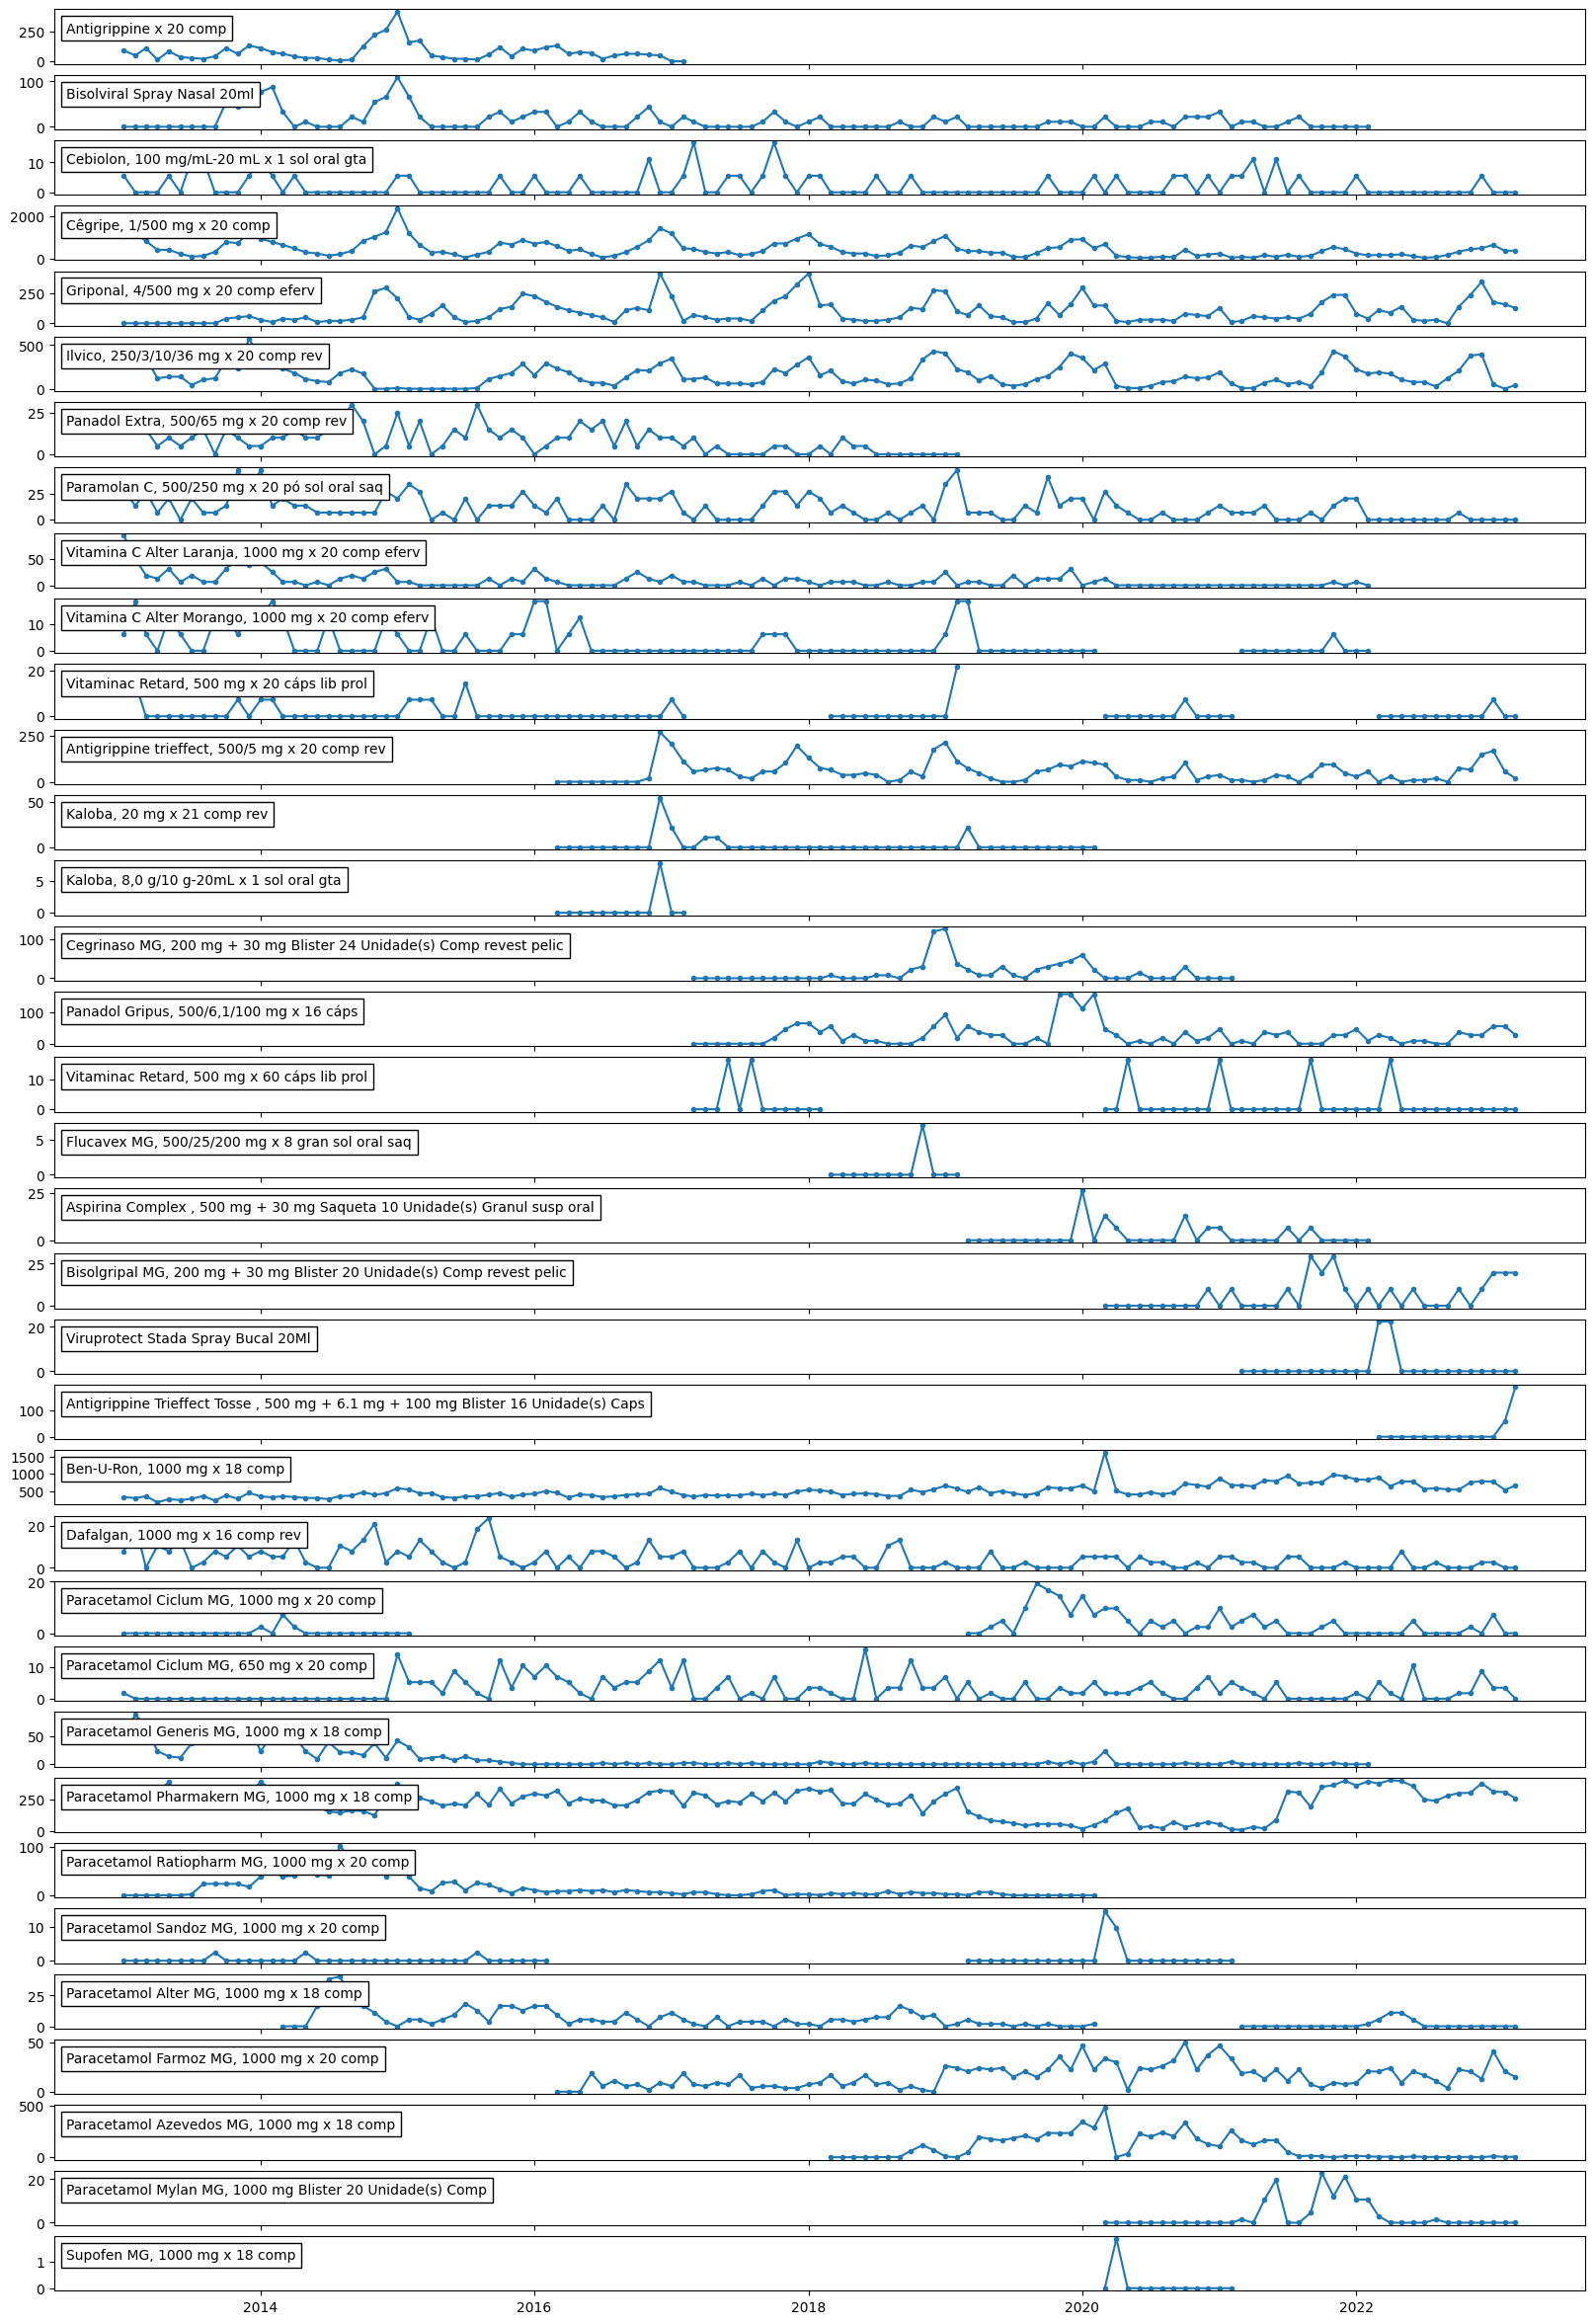

In [17]:
fig, ax = plt.subplots(35, 1, figsize=(20,30), sharex=True)
for i, col in enumerate(df.columns):
    ax[i].plot(df.loc[:,col], marker='.')
    med_name = df_metainfo.query('cod == @col').iloc[0,1]
    at = AnchoredText(med_name, loc="upper left")
    ax[i].add_artist(at)
plt.show()

In [18]:
with pd.option_context('display.max_rows', 10, 'display.min_rows', 25):
    display(df.describe().T.round(2))
    #display(df.mask(df == 0).describe().T.round(2))

,count,mean,std,min,25%,50%,75%,max
cod,,,,,,,,
2487593,50.0,76.04,73.63,0.0,27.60,58.65,108.68,414.00
6293159,110.0,13.04,20.95,0.0,0.00,0.00,21.90,109.50
9869800,123.0,2.17,3.67,0.0,0.00,0.00,5.55,16.65
5054168,123.0,439.57,371.50,28.8,163.20,336.00,648.00,2361.60
5472949,123.0,93.53,92.57,0.0,29.70,49.50,138.60,415.80
...,...,...,...,...,...,...,...,...
5473020,97.0,5.39,7.36,0.0,0.00,3.68,7.36,40.48
5592019,85.0,15.93,11.51,0.0,7.48,14.96,22.44,50.49
5271036,61.0,96.88,114.21,0.0,2.48,34.72,178.56,481.12


In [19]:
df.to_csv('df_dados_GeC.csv')
df_metainfo.to_csv('df_metainfo_GeC.csv')

In [20]:
del at, ax, col, fig, i, med_name, numero_medicamentos

# 3. Agrupamento das séries por categorias de medicamentos

## 3.1. Tratamento dos dados

In [21]:
df_categ = pd.read_csv('categorias_medicamentos.csv', sep=';')
df_categ.classif.value_counts()

classif
2.10 - Analgésicos e antipiréticos     24
5 - Sistema Respiratório                6
11.3.1.2 - Vitaminas hidrossolúveis     5
Name: count, dtype: int64

In [22]:
df_grouped = pd.merge(df_merged, df_categ.filter(['cod', 'classif']), on=['cod'], how='left')
df_grouped = df_grouped.drop(columns=['cod','nome','pvp']).groupby('classif').sum().T
df_grouped.index = pd.to_datetime(df_grouped.index)
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2013-01-01 to 2023-03-01
Data columns (total 3 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   11.3.1.2 - Vitaminas hidrossolúveis  123 non-null    float64
 1   2.10 - Analgésicos e antipiréticos   123 non-null    float64
 2   5 - Sistema Respiratório             123 non-null    float64
dtypes: float64(3)
memory usage: 3.8 KB


In [23]:
df_grouped.head()

classif,11.3.1.2 - Vitaminas hidrossolúveis,2.10 - Analgésicos e antipiréticos,5 - Sistema Respiratório
2013-01-01,119.27,2189.80,0.0
2013-02-01,82.67,2303.28,0.0
2013-03-01,24.84,2088.21,0.0
2013-04-01,12.42,1060.62,0.0
2013-05-01,49.02,1334.00,0.0


## 3.2. Visualização das séries temporais

In [24]:
fig = px.line(df_grouped, x=df_grouped.index, y=df_grouped.columns)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

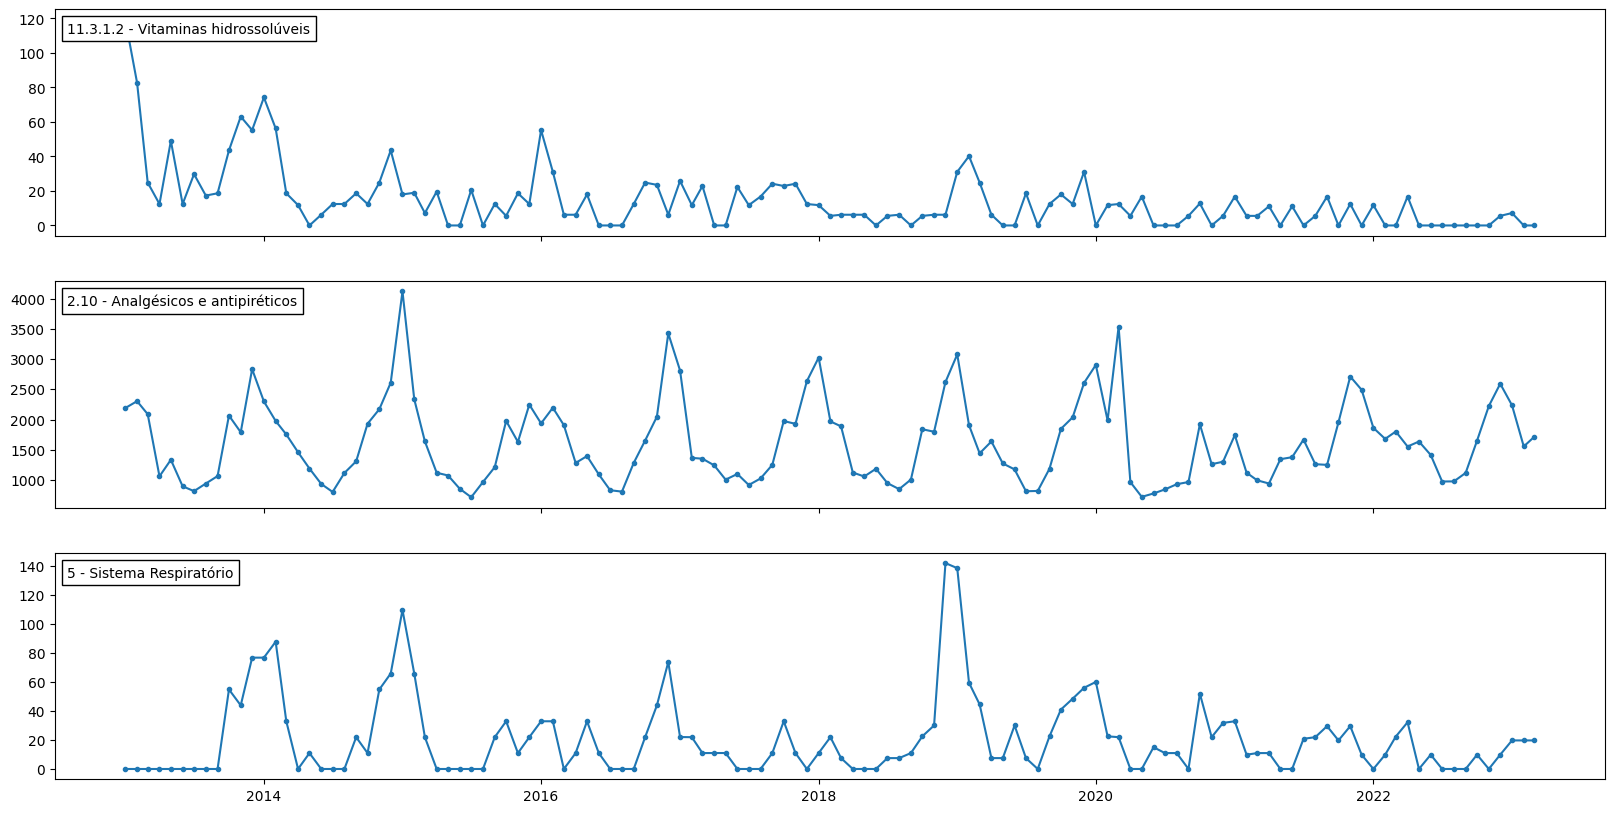

In [25]:
fig, ax = plt.subplots(3, 1, figsize=(20,10), sharex=True)
for i, col in enumerate(df_grouped.columns):
    ax[i].plot(df_grouped.loc[:,col], marker='.')
    med_name = col
    at = AnchoredText(med_name, loc="upper left")
    ax[i].add_artist(at)
plt.show()

# 4. Decomposição


## 4.1. Decomposição Aditiva

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decomposition_additive(df_grouped,col):
    decompose_additive = seasonal_decompose(df_grouped[col],model='additive')
    decompose_additive.plot()
    


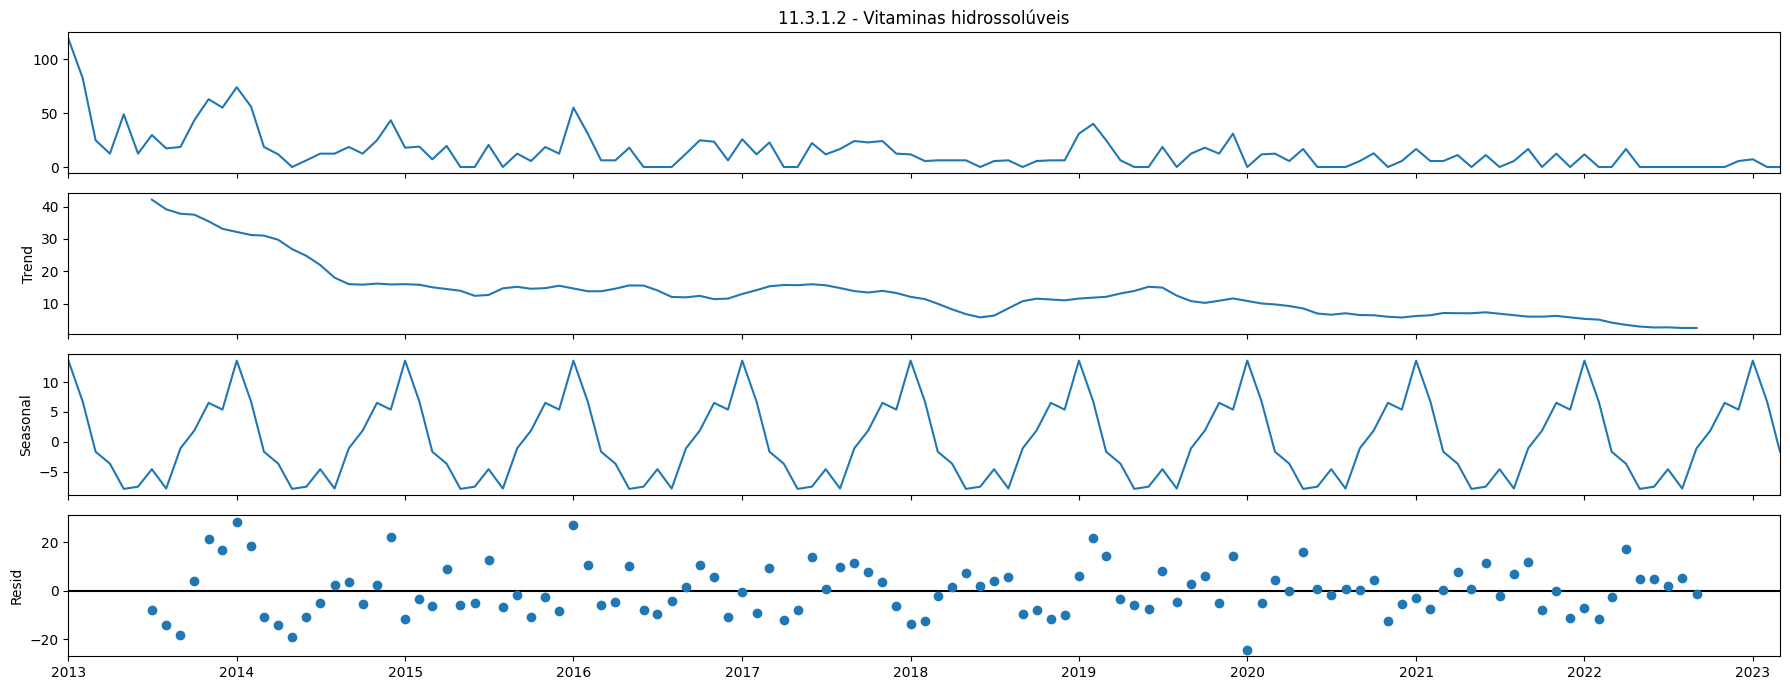

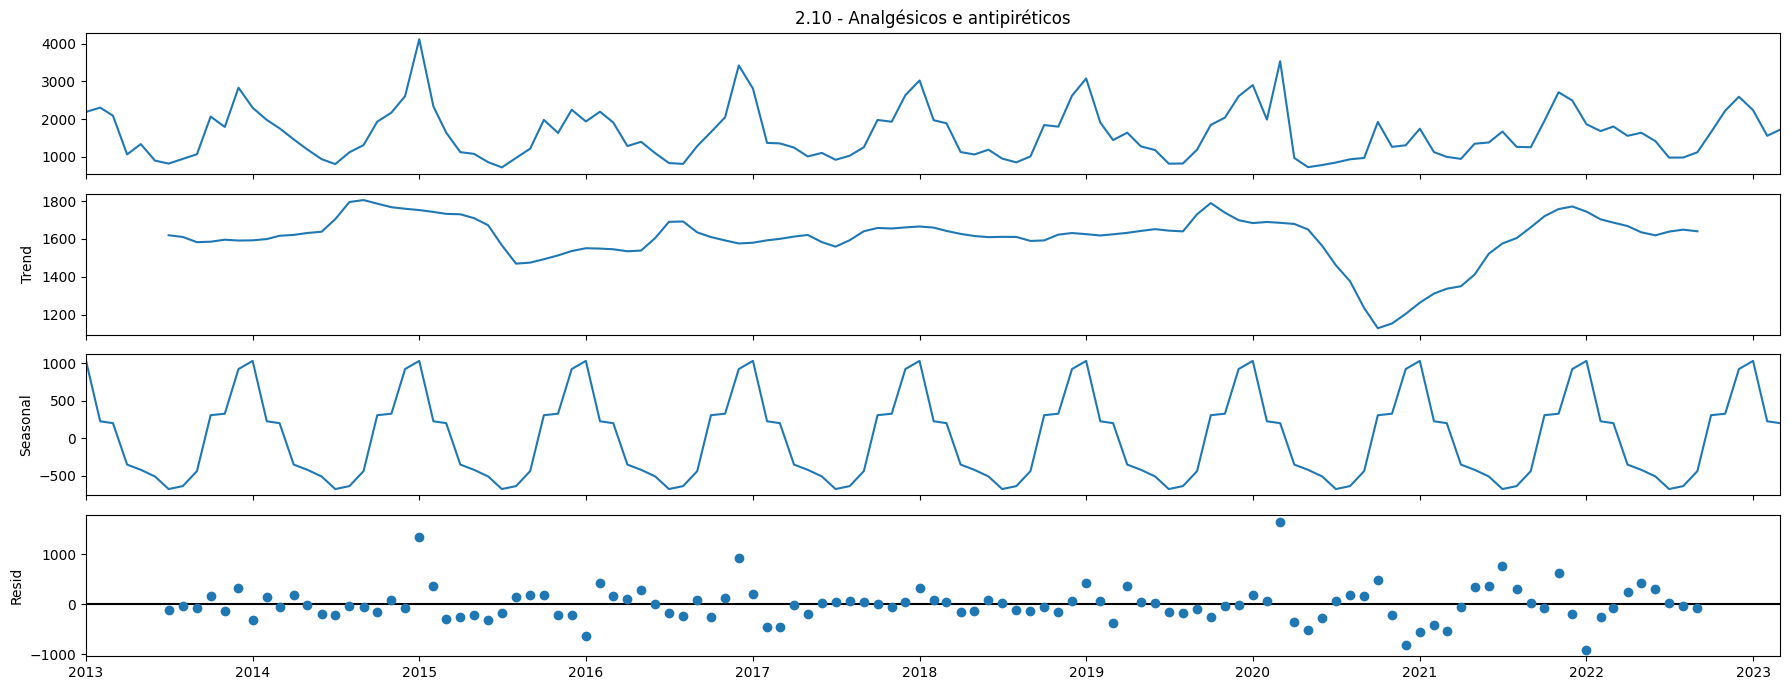

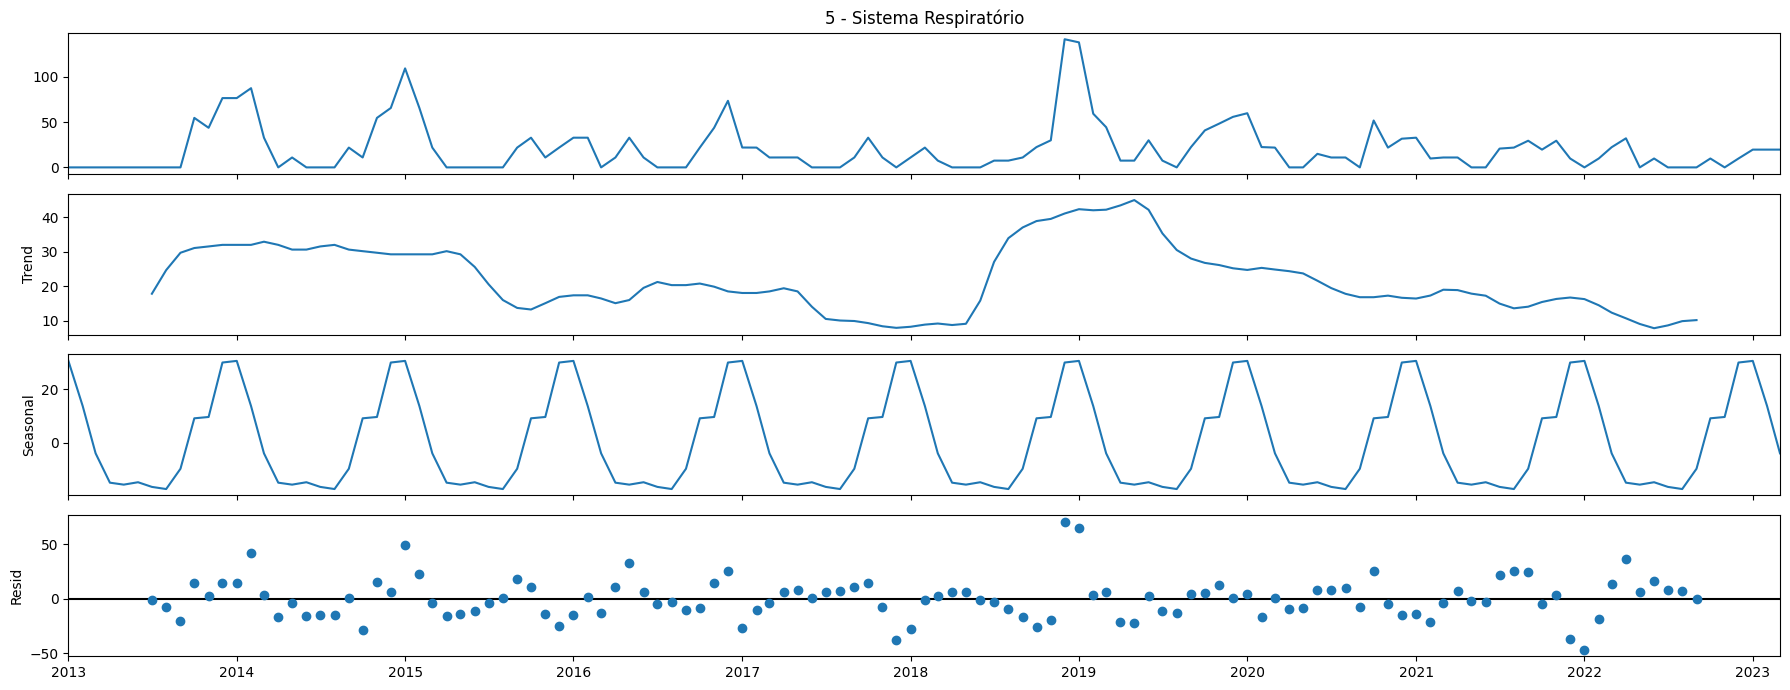

In [27]:
for col in df_grouped:
    decomposition_additive(df_grouped,col)

In [28]:
def decomposition_additive(df_grouped, col):
    decompose_additive = seasonal_decompose(df_grouped[col], model='additive')
    
    # Accessing the decomposed values
    df_decomp_additive = pd.DataFrame({
        'observed': decompose_additive.observed,
        'trend': decompose_additive.trend,
        'seasonal': decompose_additive.seasonal,
        'residual': decompose_additive.resid
    })
    
    return df_decomp_additive

for col in df_grouped:
    result = decomposition_additive(df_grouped, col)
        
    print(f"Decomposição aditiva para série '{col}':")
    print(result.head(15))
    print("\n" + "="*40 + "\n")


Decomposição aditiva para série '11.3.1.2 - Vitaminas hidrossolúveis':
            observed      trend   seasonal   residual
2013-01-01    119.27        NaN  13.582417        NaN
2013-02-01     82.67        NaN   6.743528        NaN
2013-03-01     24.84        NaN  -1.654528        NaN
2013-04-01     12.42        NaN  -3.647028        NaN
2013-05-01     49.02        NaN  -7.871565        NaN
2013-06-01     12.42        NaN  -7.496241        NaN
2013-07-01     29.73  42.127500  -4.574144  -7.823356
2013-08-01     17.31  39.145417  -7.805644 -14.029773
2013-09-01     18.63  37.783750  -1.081685 -18.072065
2013-10-01     43.47  37.497500   1.884778   4.087722
2013-11-01     63.07  35.427500   6.525056  21.117444
2013-12-01     55.23  33.126250   5.395056  16.708694
2014-01-01     74.17  32.146250  13.582417  28.441333
2014-02-01     56.20  31.221250   6.743528  18.235222
2014-03-01     18.63  31.017500  -1.654528 -10.732972


Decomposição aditiva para série '2.10 - Analgésicos e antipirét

## 4.2. Decomposição STL


In [29]:
from statsmodels.tsa.seasonal import STL
def decomposition_STL(df_grouped,col):
    decompose_STL = STL(df_grouped[col]).fit()
    decompose_STL.plot()

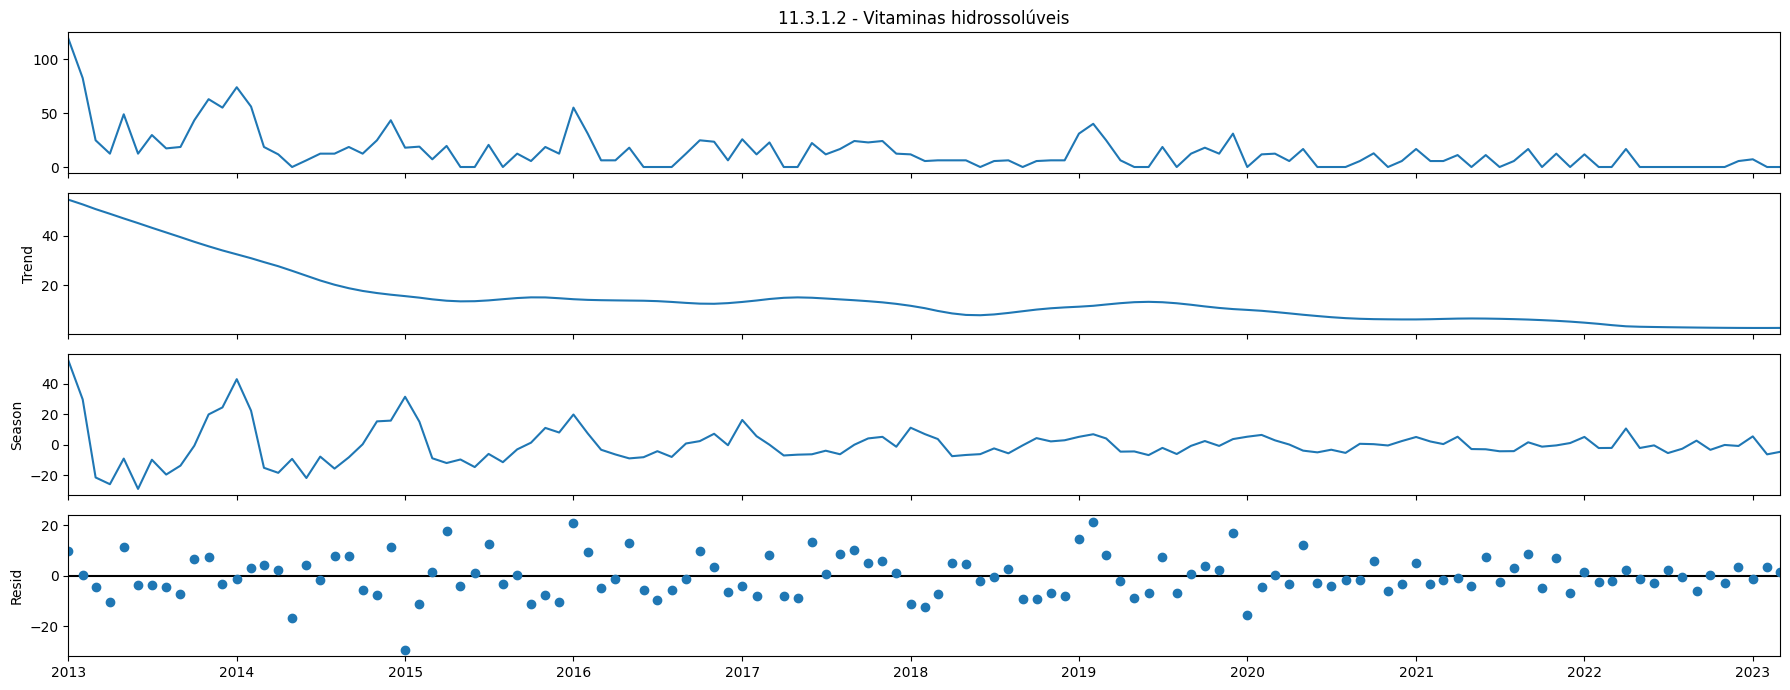

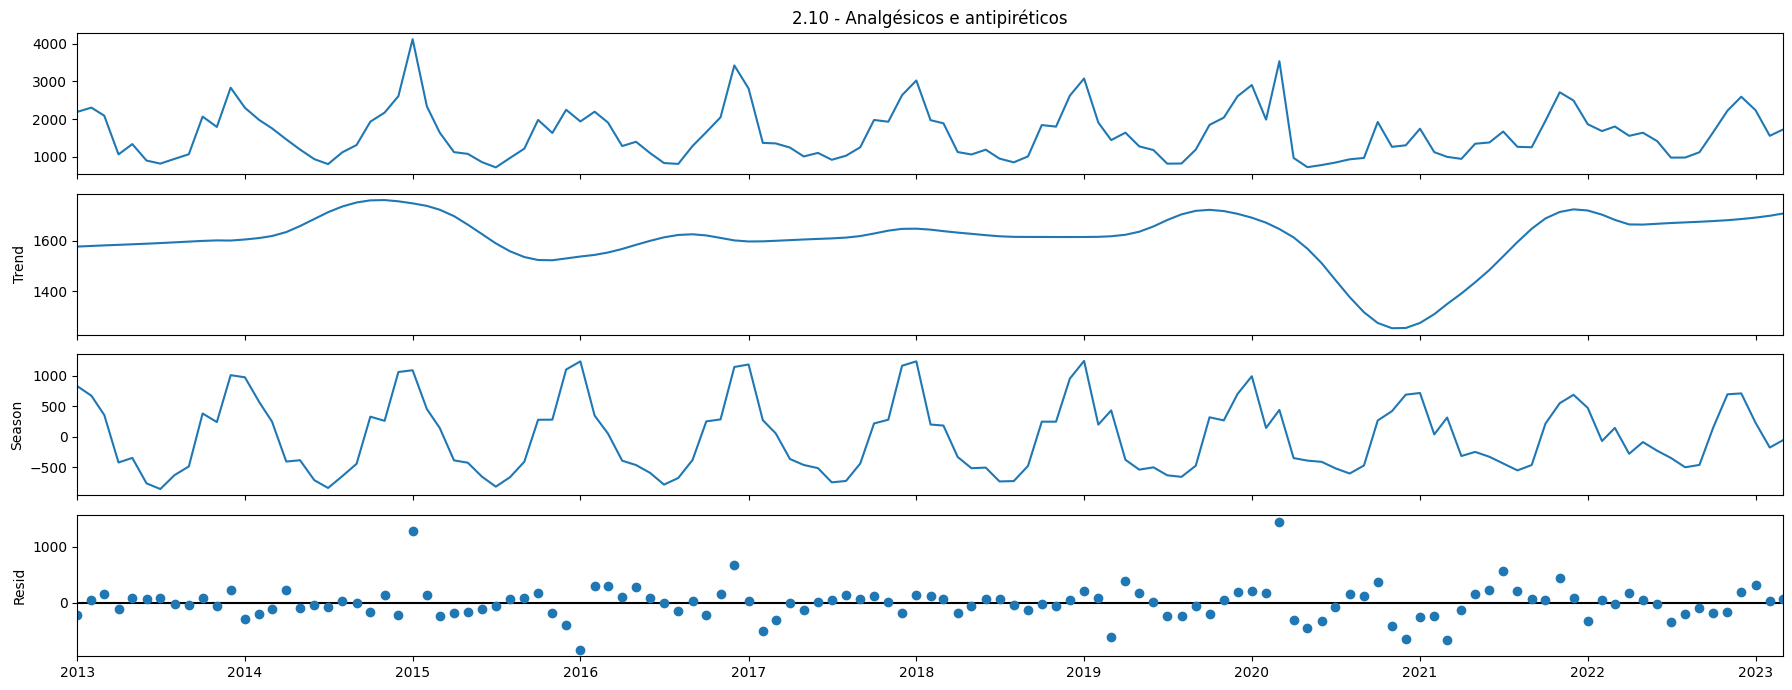

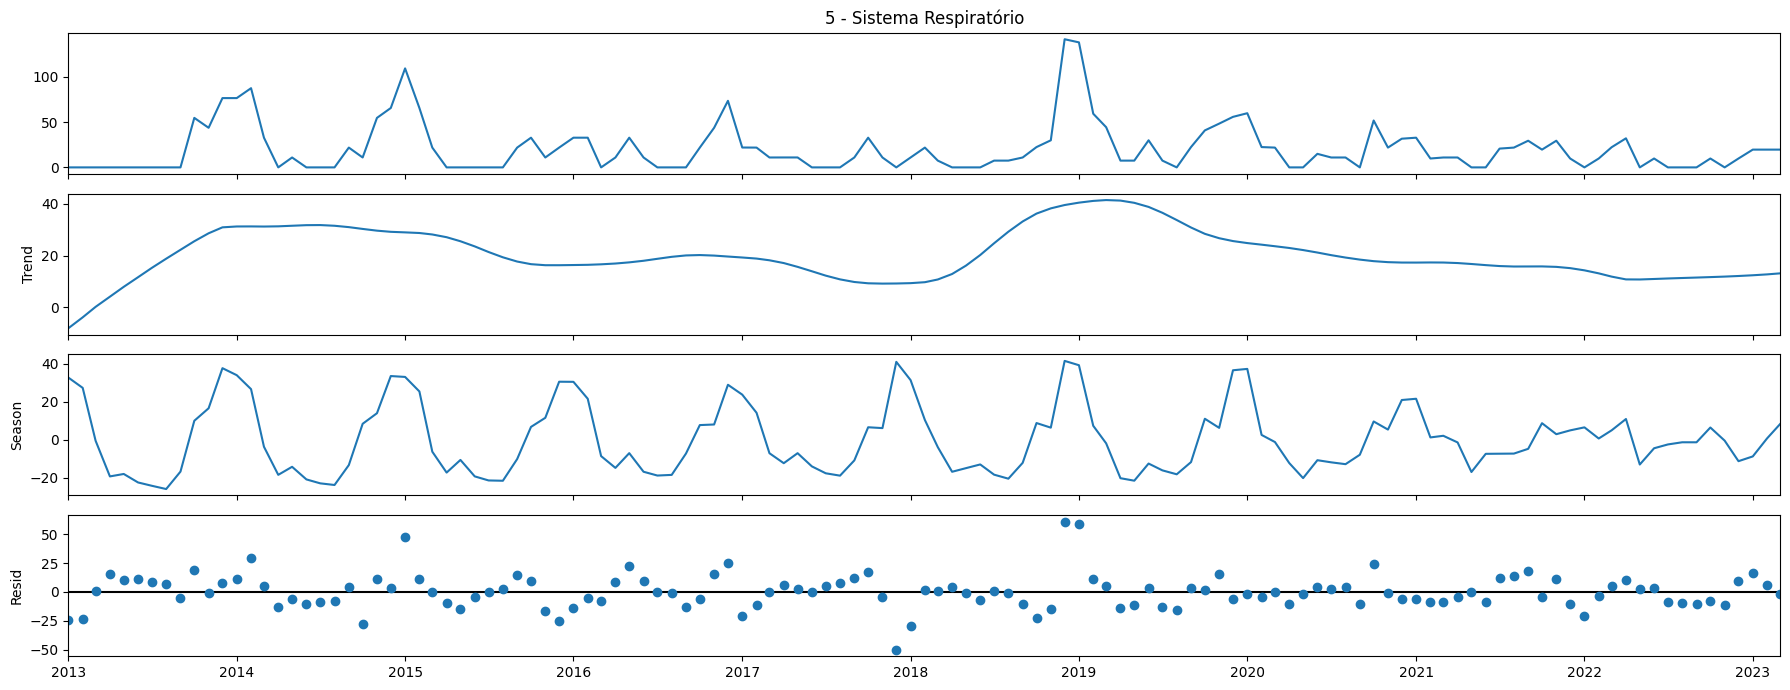

In [30]:
for col in df_grouped:
    decomposition_STL(df_grouped,col)

In [31]:
def decomposition_STL(df_grouped, col):
    decompose_STL = STL(df_grouped[col]).fit()
    
    df_decomp_STL = pd.DataFrame({
        'observed': decompose_STL .observed,
        'trend': decompose_STL .trend,
        'seasonal': decompose_STL .seasonal,
        'residual': decompose_STL .resid
    })
    
    return df_decomp_STL

for col in df_grouped:
    result = decomposition_STL(df_grouped, col)
        
    print(f"Decomposição STL para série '{col}':")
    print(result.head(5))
    print("\n" + "="*40 + "\n")

Decomposição STL para série '11.3.1.2 - Vitaminas hidrossolúveis':
            observed      trend   seasonal   residual
2013-01-01    119.27  54.399014  55.214095   9.656891
2013-02-01     82.67  52.503681  29.754837   0.411483
2013-03-01     24.84  50.622793 -21.433175  -4.349618
2013-04-01     12.42  48.749048 -25.854811 -10.474237
2013-05-01     49.02  46.877467  -9.041020  11.183553


Decomposição STL para série '2.10 - Analgésicos e antipiréticos':
            observed        trend    seasonal    residual
2013-01-01   2189.80  1576.662918  834.221783 -221.084701
2013-02-01   2303.28  1579.174468  675.966927   48.138605
2013-03-01   2088.21  1581.446630  359.741608  147.021762
2013-04-01   1060.62  1583.624636 -419.864939 -103.139697
2013-05-01   1334.00  1585.807179 -344.859887   93.052708


Decomposição STL para série '5 - Sistema Respiratório':
            observed     trend   seasonal   residual
2013-01-01       0.0 -8.069087  32.656241 -24.587153
2013-02-01       0.0 -3.86606

## 4.3 Caracteristicas STL

### 4.3.1 Força da tendência e da sazonalidade

In [32]:
def decomposition_STL(df_grouped, col):
    decompose_STL = STL(df_grouped[col]).fit()
    
    df_decomp_STL = pd.DataFrame({
        'observed': decompose_STL.observed,
        'trend': decompose_STL.trend,
        'seasonal': decompose_STL.seasonal,
        'residual': decompose_STL.resid
    })
    
    # Cálculo da força da tendência
    trend_var = np.var(df_decomp_STL['trend'] + df_decomp_STL['residual'])
    residual_var = np.var(df_decomp_STL['residual'])
    trend_strength = max(0, 1 - (residual_var / trend_var))
    
    # Cálculo da força da sazonalidade
    seasonal_var = np.var(df_decomp_STL['seasonal'] + df_decomp_STL['residual'])
    seasonal_strength = max(0, 1 - (residual_var / seasonal_var))
    
    return df_decomp_STL, trend_strength, seasonal_strength

for col in df_grouped:
    result, trend_strength, seasonal_strength = decomposition_STL(df_grouped, col)
        
    print(f"Decomposição STL para série '{col}':")
    print(result.head(5))
    print(f"Força da tendência para série '{col}': {trend_strength}")
    print(f"Força da sazonalidade para série '{col}': {seasonal_strength}")
    print("\n" + "="*40 + "\n")

Decomposição STL para série '11.3.1.2 - Vitaminas hidrossolúveis':
            observed      trend   seasonal   residual
2013-01-01    119.27  54.399014  55.214095   9.656891
2013-02-01     82.67  52.503681  29.754837   0.411483
2013-03-01     24.84  50.622793 -21.433175  -4.349618
2013-04-01     12.42  48.749048 -25.854811 -10.474237
2013-05-01     49.02  46.877467  -9.041020  11.183553
Força da tendência para série '11.3.1.2 - Vitaminas hidrossolúveis': 0.6775577598689141
Força da sazonalidade para série '11.3.1.2 - Vitaminas hidrossolúveis': 0.6844580999247205


Decomposição STL para série '2.10 - Analgésicos e antipiréticos':
            observed        trend    seasonal    residual
2013-01-01   2189.80  1576.662918  834.221783 -221.084701
2013-02-01   2303.28  1579.174468  675.966927   48.138605
2013-03-01   2088.21  1581.446630  359.741608  147.021762
2013-04-01   1060.62  1583.624636 -419.864939 -103.139697
2013-05-01   1334.00  1585.807179 -344.859887   93.052708
Força da tendê

In [33]:
def decomposition_STL(df_grouped, col):
    decompose_STL = STL(df_grouped[col]).fit()
    
    df_decomp_STL = pd.DataFrame({
        'observed': decompose_STL .observed,
        'trend': decompose_STL .trend,
        'seasonal': decompose_STL .seasonal,
        'residual': decompose_STL .resid
    })
    
    return df_decomp_STL

## 4.4 Outliers

In [34]:
def outlier_tukey(df, column):
    """
    Given the data frame and a numeric column, outputs the outlier data frame.
    inputs: df - pandas data frame; column - string
    output: pandas data frame
    """
    Q1 = df.quantile(0.25).loc[column]
    Q3 = df.quantile(0.75).loc[column]
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    df_outliers = df.query(f'{column} < @lower_fence or {column} > @upper_fence')
    return df_outliers

In [35]:
for col in df_grouped:
    df_decomp_STL = decomposition_STL(df_grouped, col)
    
    # Detetar os outliers da coluna dos resíduos
    outliers = outlier_tukey(df_decomp_STL, 'residual')
    
    # Visualizar os outliers 
    cm = sns.color_palette("vlag", as_cmap=True)
    print(f"Outliers para a série '{col}':")
    display(outliers.filter(['residual']).style.background_gradient(cmap=cm))
    print("\n" + "="*40 + "\n")

Outliers para a série '11.3.1.2 - Vitaminas hidrossolúveis':


,residual
2015-01-01 00:00:00,-29.267589
2016-01-01 00:00:00,20.864955
2019-02-01 00:00:00,21.398780




Outliers para a série '2.10 - Analgésicos e antipiréticos':


,residual
2015-01-01 00:00:00,1277.783415
2016-01-01 00:00:00,-842.019431
2016-12-01 00:00:00,674.464961
2019-03-01 00:00:00,-611.733028
2020-03-01 00:00:00,1446.780964
2020-12-01 00:00:00,-646.079965
2021-03-01 00:00:00,-672.935547




Outliers para a série '5 - Sistema Respiratório':


,residual
2015-01-01 00:00:00,47.524690
2017-12-01 00:00:00,-50.153950
2018-12-01 00:00:00,60.761952
2019-01-01 00:00:00,58.658933


## 4.5 Estacionariedade

### 4.5.1 Teste KPSS (Teste Kwiatkowski–Phillips–Schmidt–Shin)

In [36]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

for col in df_grouped:
    print(f"KPSS Teste para a série '{col}':")
    kpss_test(df_grouped[col])
    print("\n" + "="*40 + "\n")


KPSS Teste para a série '11.3.1.2 - Vitaminas hidrossolúveis':
Results of KPSS Test:
Test Statistic           1.189848
p-value                  0.010000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


KPSS Teste para a série '2.10 - Analgésicos e antipiréticos':
Results of KPSS Test:
Test Statistic           0.021855
p-value                  0.100000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


KPSS Teste para a série '5 - Sistema Respiratório':
Results of KPSS Test:
Test Statistic           0.074111
p-value                  0.100000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: fl

C:\Users\Maria Inês\AppData\Local\Temp\ipykernel_27952\3303681801.py:5: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.


C:\Users\Maria Inês\AppData\Local\Temp\ipykernel_27952\3303681801.py:5: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


C:\Users\Maria Inês\AppData\Local\Temp\ipykernel_27952\3303681801.py:5: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




In [37]:
#Comentários do teste KPSS: hipótese nula de que uma série temporal é estacionária em torno de uma tendência, em oposição à hipótese alternativa de que a série é não estacionária.

# Os resultados indicam que, para as 2 ultimas séries, 
# o Test Statistic é menor do que os Critical Values, mas o valor-p é igual a 0.1, que é maior do que o nível de significância típico de 0.05.

# Não se rejeita a hipotese nula de estacionariedade. 

# As séries são estacionárias.

### 4.5.2 Teste ADF (Teste Dickey-Fuller Aumentado)

In [38]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

for col in df_grouped:
    print(f"Teste ADF para a série '{col}':")
    adf_test(df_grouped[col])
    print("\n" + "="*40 + "\n")


Teste ADF para a série '11.3.1.2 - Vitaminas hidrossolúveis':
Results of Dickey-Fuller Test:
Test Statistic                -7.585287e+00
p-value                        2.616550e-11
#Lags Used                     0.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


Teste ADF para a série '2.10 - Analgésicos e antipiréticos':
Results of Dickey-Fuller Test:
Test Statistic                -7.541956e+00
p-value                        3.359832e-11
#Lags Used                     7.000000e+00
Number of Observations Used    1.150000e+02
Critical Value (1%)           -3.488535e+00
Critical Value (5%)           -2.887020e+00
Critical Value (10%)          -2.580360e+00
dtype: float64


Teste ADF para a série '5 - Sistema Respiratório':
Results of Dickey-Fuller Test:
Test Statistic                  -5.551002
p-value                          0.000002

In [39]:
#Comentários do teste ADF: hipotese nula de não estacionariedade, hipotese alternativa de estacionariedade


# Se o p-value for menor que o nível de significância 0.05, rejeita-se a hipótese nula.
# Conclui-se que há evidências de estacionariedade.

# Mesmo que os valores do teste estatístico sejam negativos, 
# a direção não importa tanto quanto a significância estatística 
# e a interpretação em relação aos valores críticos e ao p-value.

# Em resumo, os resultados fornecidos indicam que as séries temporais 
# para as colunas mencionadas são estacionárias, pois o p-value é muito baixo, 
# rejeitando a hipótese nula de não estacionariedade. 

#
# O teste estatístico negativo sugere que há uma tendência decrescente nas séries temporais.

# As séries são estacionárias o que significa que as propriedades estatísticas dessa série não mudam ao longo do tempo. 
# Noutras palavras, os parâmetros fundamentais das series temporais, como média e variância, permanecem constantes ao longo do tempo.

### 4.5.3 Normalidade

In [40]:
import scipy.stats as stats

def jarque_bera_test(timeseries):
    name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
    
    # Calcula a estatística de Jarque-Bera e p-value
    jb_stat, jb_pvalue = stats.jarque_bera(timeseries)
    
    # Calcula a assimetria e curtose
    skewness = stats.skew(timeseries)
    kurtosis = stats.kurtosis(timeseries)
    
    # Retorna os resultados
    return dict(zip(name, [jb_stat, jb_pvalue, skewness, kurtosis]))

for col in df_grouped:
    print(f"Teste Jarque-Bera test para a série '{col}':")
    result = jarque_bera_test(df_grouped[col])
    
    # Imprime os resultados em linhas separadas
    print(f"Jarque-Bera: {result['Jarque-Bera']}")
    print(f"Chi^2 two-tail prob.: {result['Chi^2 two-tail prob.']}")
    print(f"Skew: {result['Skew']}")
    print(f"Kurtosis: {result['Kurtosis']}")
    
    print("\n" + "="*40 + "\n")


Teste Jarque-Bera test para a série '11.3.1.2 - Vitaminas hidrossolúveis':
Jarque-Bera: 599.7961944304943
Chi^2 two-tail prob.: 5.700477635165046e-131
Skew: 2.644291240552938
Kurtosis: 9.437388363941364


Teste Jarque-Bera test para a série '2.10 - Analgésicos e antipiréticos':
Jarque-Bera: 25.313451025670638
Chi^2 two-tail prob.: 3.186060004545588e-06
Skew: 1.0088318553591806
Kurtosis: 0.931795635683399


Teste Jarque-Bera test para a série '5 - Sistema Respiratório':
Jarque-Bera: 277.52440276455616
Chi^2 two-tail prob.: 5.449311608654564e-61
Skew: 2.197109985216902
Kurtosis: 5.90270563639174




In [41]:
# Com base nos resultados do teste de Jarque-Bera, para todas as três séries, 
# a evidência sugere fortemente que elas não seguem uma distribuição normal. 
# As assimetrias e curtoses elevadas indicam desvios significativos da normalidade, e os valores-p muito baixos reforçam a rejeição da hipótese nula de normalidade.

# 5. Exportar dados para o notebook seguinte

In [42]:
df_grouped = df_grouped.reset_index()
df_grouped.to_csv('Dados_intermedios/df_nb1.csv', index=False)